In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing or loading the train dataset
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

Data column definitions:

1) W - Nuber of wins: Target or label column which need to be predicted. Is of numerical and discrete type. Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work

2) R - Runs scored: times reached home plate legally and safely

3) AB - At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

4) H - Hit: reaching base because of a batted, fair ball without error by the defense. Hits allowed: total hits allowed

5) 2B - Double: hits on which the batter reaches second base safely without the contribution of a fielding error

6) 3B - Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

7) HR - Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

8) BB - Base on balls: times pitching four balls, allowing the batter to take first base

9) SO - Strikeout: number of batters who received strike three

10) SB - Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

11) RA - Run average: number of runs allowed times nine divided by innings pitched

12) ER - Earned run: number of runs that did not occur as a result of errors or passed balls

13) ERA - Earned run average: total number of earned runs, multiplied by 9, divided by innings pitched

14) CG - Complete game: number of games where player was the only pitcher for their team

15) SHO - Shutout: number of complete games pitched with no runs allowed

16) SV - Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

17) E - Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result


In [4]:
#Checking columns
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

W - target
remaining 16 columns - Input features

In [5]:
#Checkin for data shape
df.shape

(30, 17)

In [6]:
#Checking data types
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

No need of encoding

In [7]:
#Checking any null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values present

In [8]:
#Checking if all entries of a column is unique or not
for i in df.columns:
    print('For column of {} :'.format(i),(len(df[i].unique())==len(df[i])))

For column of W : False
For column of R : False
For column of AB : False
For column of H : False
For column of 2B : False
For column of 3B : False
For column of HR : False
For column of BB : False
For column of SO : False
For column of SB : False
For column of RA : True
For column of ER : True
For column of ERA : True
For column of CG : False
For column of SHO : False
For column of SV : False
For column of E : False


Most of the columns has repeated values

ER and ERA columns has all unique entries in them

In [9]:
#Checking general information / general column summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [10]:
#Removing duplicate rows if any
print('Size before: ',df.shape)
df.drop_duplicates()
print('Size after: ',df.shape)

Size before:  (30, 17)
Size after:  (30, 17)


Therefore no duplicate rows present in the dataset

In [11]:
#Checking of value counts in each columns having some repeated entries
df_non = df.drop(['ER','ERA'], axis=1)
for i in df_non.columns:
    print(df_non[i].value_counts(),'\n')

68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64 

696    2
689    2
640    1
644    1
720    1
573    1
764    1
891    1
697    1
694    1
626    1
751    1
622    1
748    1
683    1
613    1
737    1
669    1
667    1
729    1
661    1
724    1
656    1
655    1
650    1
713    1
647    1
703    1
Name: R, dtype: int64 

5485    2
5571    1
5605    1
5491    1
5565    1
5457    1
5428    1
5420    1
5567    1
5480    1
5439    1
5484    1
5417    1
5544    1
5527    1
5572    1
5600    1
5533    1
5467    1
5529    1
5463    1
5459    1
5649    1
5511    1
5385    1
5640    1
5575    1
5509    1
5631    1
Name: AB, dtype: int64 

1363    2
1346    1
1374    1
1462    1
1397    1
1395    1
1479    1
1324    1
1515    1
1386    1
1383    1
1382    1
1381    1
1379    1
1378    1
1370    1
1349    1

Therefore there are no mojor non unique entries to declare a column as categorical

This is counts type of data and we have to check histogram (not distribution)

Histogram: Discrete data

Distribution plot: Continuous data

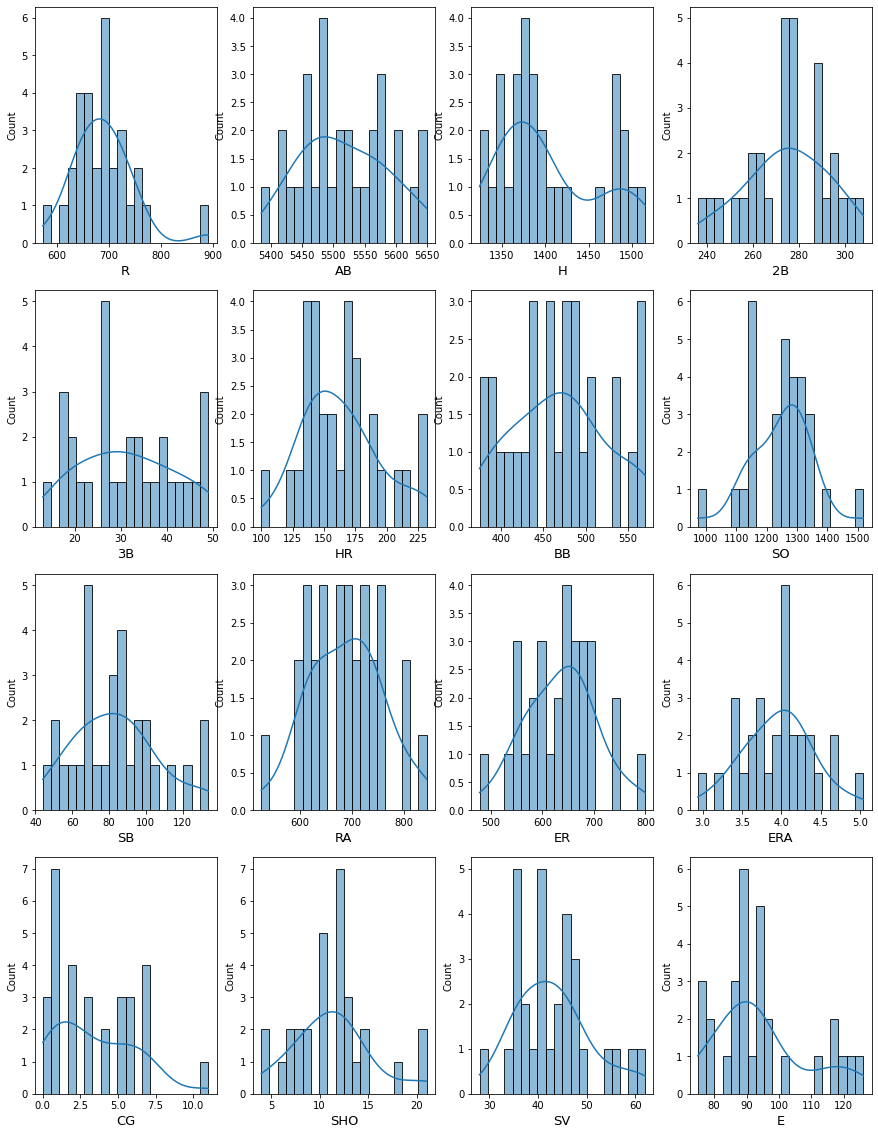

In [46]:
#Vizualization of distribution of numerical input feature columns
df_in = df.drop(['W'], axis=1)
plt.figure(figsize=(15,20))
pltno = 1
for columns in df_in:
    if pltno <=16:
        ax = plt.subplot(4,4,pltno)
        sns.histplot(df_in[columns], bins=20, kde=True)
        plt.xlabel(columns, fontsize=13)       
    pltno += 1
plt.show()

We can vizualization of input data distribution through histplots

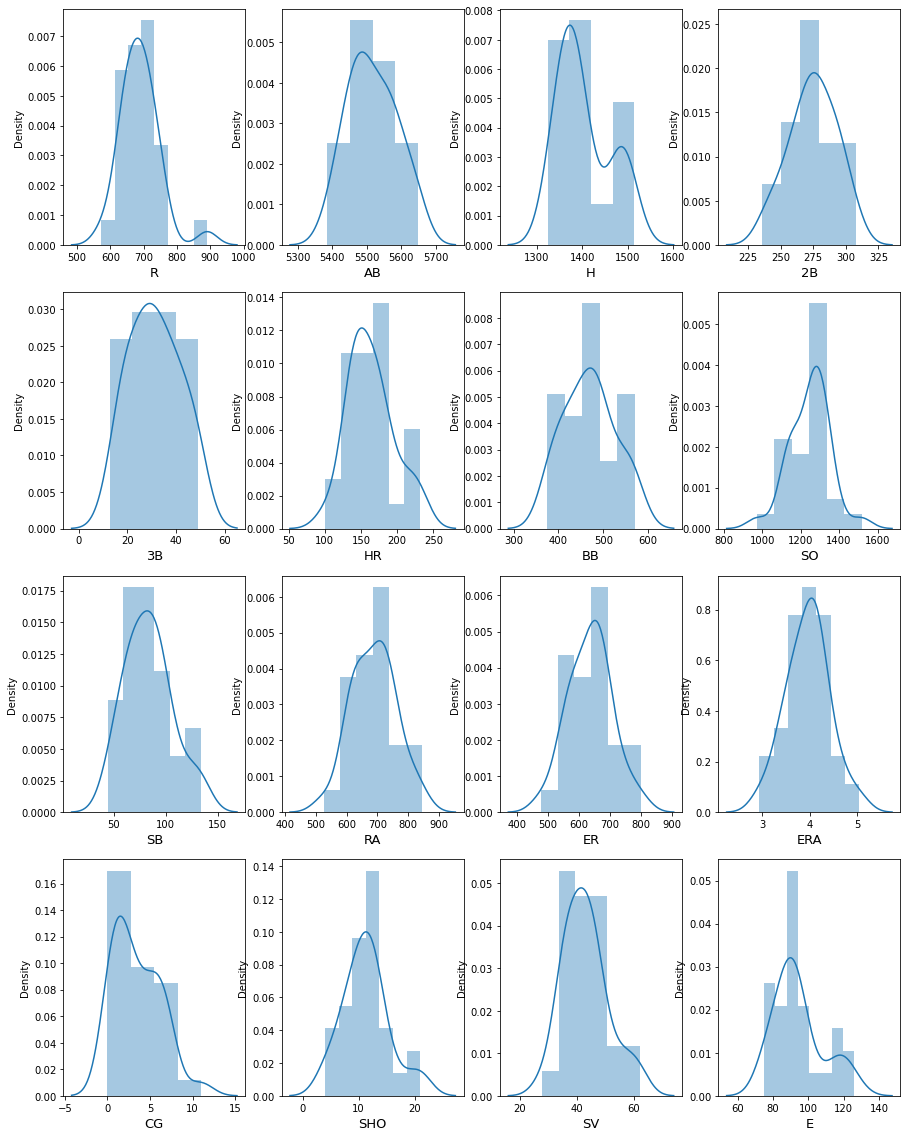

In [47]:
#If we approximate its distribution to a normally distributed data
df_in = df.drop(['W'], axis=1)
plt.figure(figsize=(15,20))
pltno = 1
for columns in df_in:
    if pltno <=16:
        ax = plt.subplot(4,4,pltno)
        sns.distplot(df_in[columns])
        plt.xlabel(columns, fontsize=13)       
    pltno += 1
plt.show()

CG, E and SHO having little right skewness in its data distribution

SO is having little right skewness in its data distribution

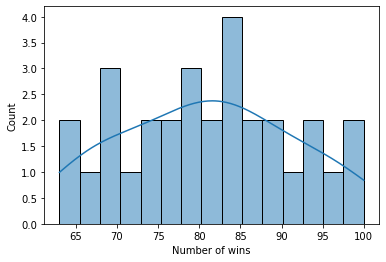

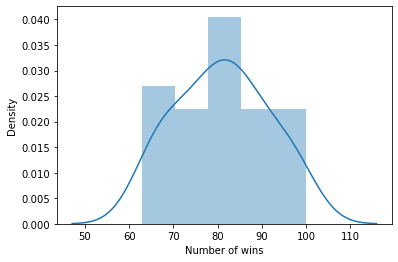

In [44]:
#Vizualization of distribution of discrete numerical output column
sns.histplot(df['W'], bins =15, kde=True)
plt.xlabel('Number of wins', fontsize=10) 
plt.show()

sns.distplot(df['W'])
plt.xlabel('Number of wins', fontsize=10) 
plt.show()

Wins is also discrete data (counts) so its distribution can be vizualized by histogram

If we approximate its distribution to a normal distributed data:

mean of around 82 wins

lowest around 48 wins

highest around 115 wins

These numerical data will be more clear in its statistical summary

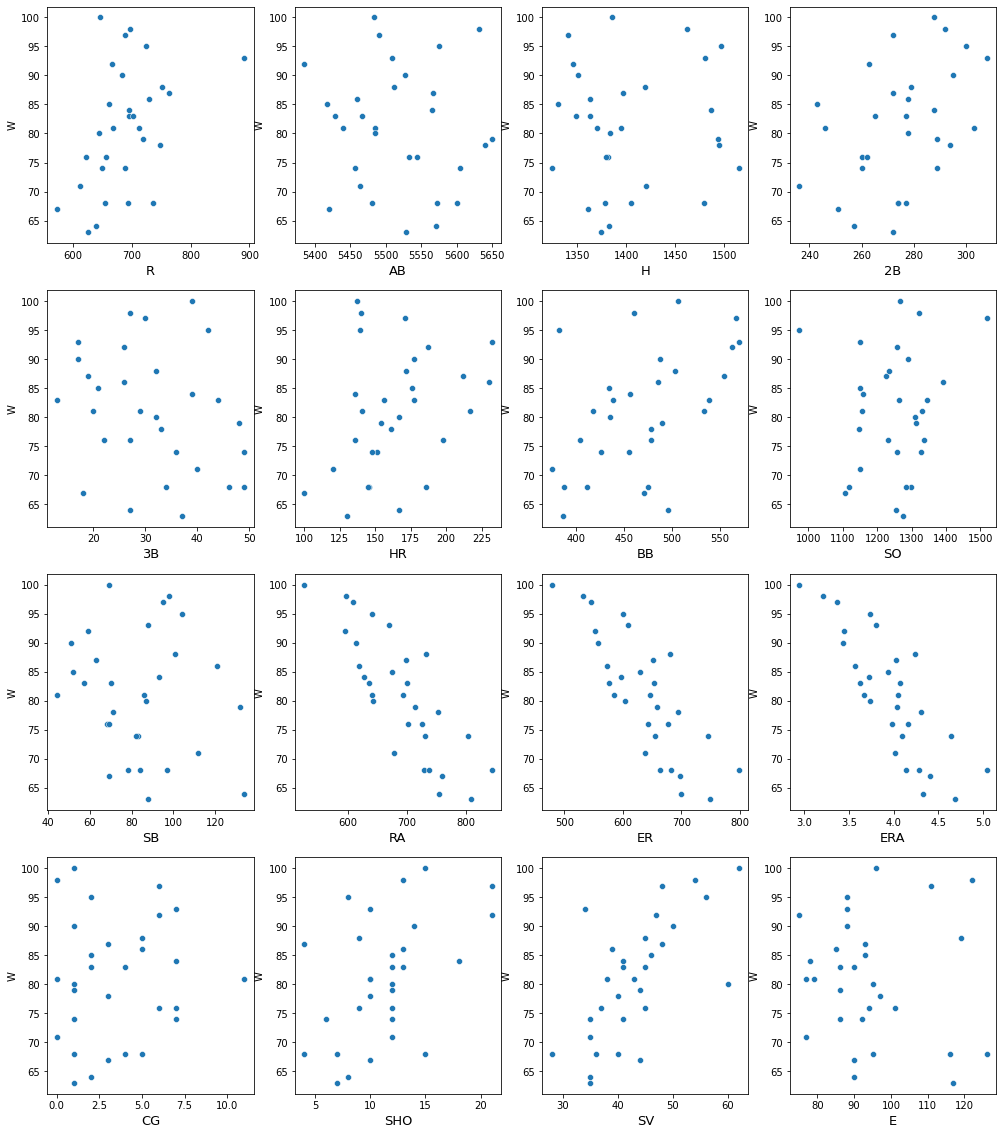

In [14]:
#Vizualization of target/label with respect to input feature columns
df_in = df.drop(['W'], axis=1)
plt.figure(figsize=(17,20))
pltno = 1
for columns in df_in:
    if pltno <=16:
        ax = plt.subplot(4,4,pltno)
        sns.scatterplot(x = df_in[columns], y = df['W'])
        plt.xlabel(columns, fontsize=13)       
    pltno += 1
plt.show()

Some input features are showing +ve relationship with target

Some input features are showing -ve relationship with target

Some input features are not showing relationship with target

Let us visualize that with reg plot

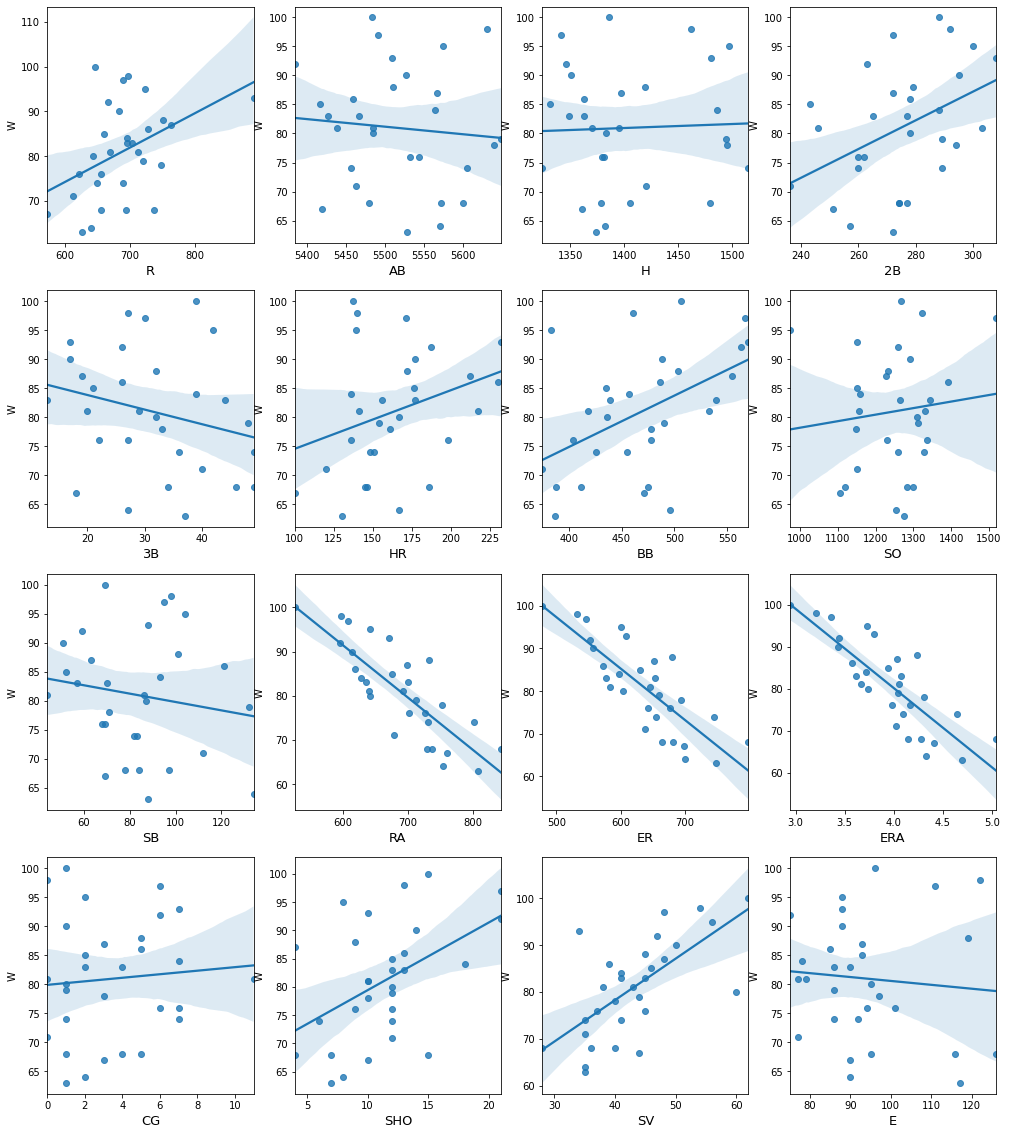

In [15]:
#Vizualization of target/label with respect to input feature columns
df_in = df.drop(['W'], axis=1)
plt.figure(figsize=(17,20))
pltno = 1
for columns in df_in:
    if pltno <=16:
        ax = plt.subplot(4,4,pltno)
        sns.regplot(x = df_in[columns], y = df['W'])
        plt.xlabel(columns, fontsize=13)       
    pltno += 1
plt.show()

Observations:

Runs R, Doubles 2B, Shoutout SHO, Save SV all these feature columns are positively correlated with number of wins W

Runs average RA, Earned run ER, Earned run average ERA all these feature columns are negatively correlated with number of wins W

At bat AB, Hit H, Triples 3B, Home run HR, Base on balls BB, Strieout SO, Stolen Base SB, Complete game CG, Errors E all these feature columns are almost neutrally correlated with number of wins W

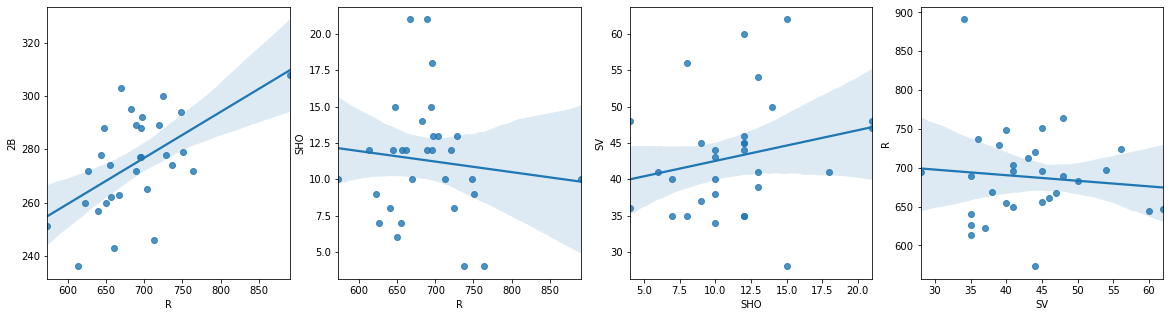

In [16]:
#Let us vizualize inter correlation (multicollinearity) among these input feature columns which are having + relationship with target
plt.figure(figsize=(20,5))
ax = plt.subplot(1,4,1)
sns.regplot(x = df['R'], y = df['2B'])
ax = plt.subplot(1,4,2)
sns.regplot(x = df['R'], y = df['SHO'])
ax = plt.subplot(1,4,3)
sns.regplot(x = df['SHO'], y = df['SV'])
ax = plt.subplot(1,4,4)
sns.regplot(x = df['SV'], y = df['R'])
plt.show()

Observations:

Runs and doubles are correlated with each other strongly

<AxesSubplot:xlabel='RA', ylabel='ERA'>

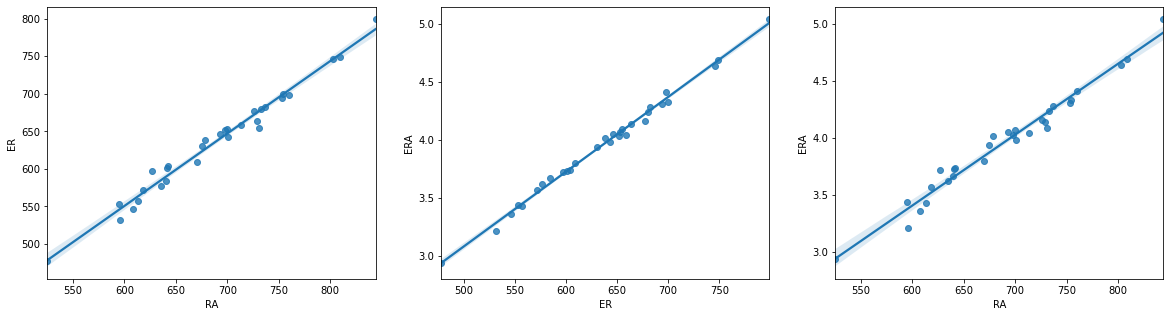

In [17]:
#Let us vizualize inter correlation (multicollinearity) among these input feature columns which are having negative relationship with target
plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,1)
sns.regplot(x = df['RA'], y = df['ER'])
ax = plt.subplot(1,3,2)
sns.regplot(x = df['ER'], y = df['ERA'])
ax = plt.subplot(1,3,3)
sns.regplot(x = df['RA'], y = df['ERA'])

Observation:

Runs average RA, Earned run ER, Earned run average ERA all three are highly correlated among themselves

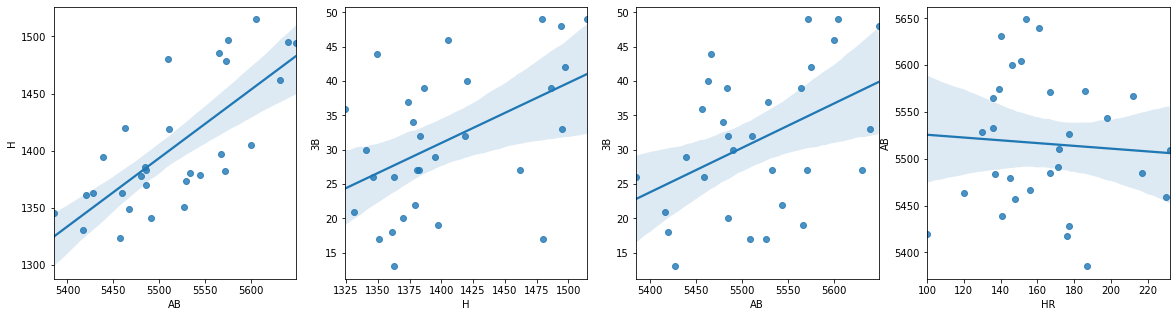

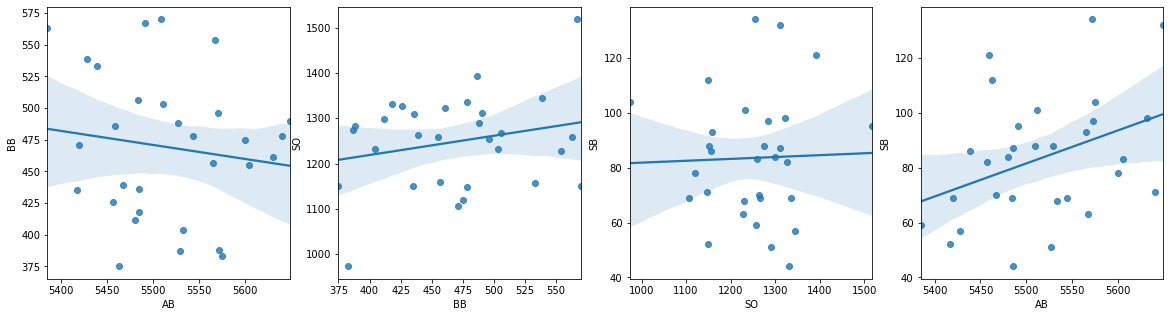

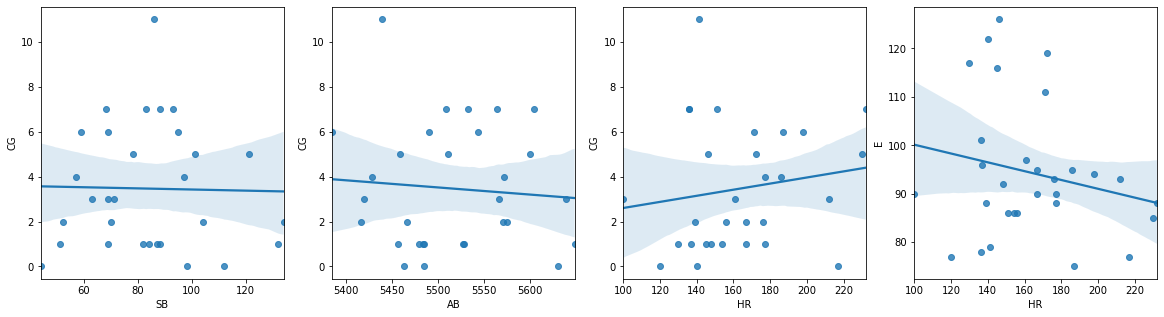

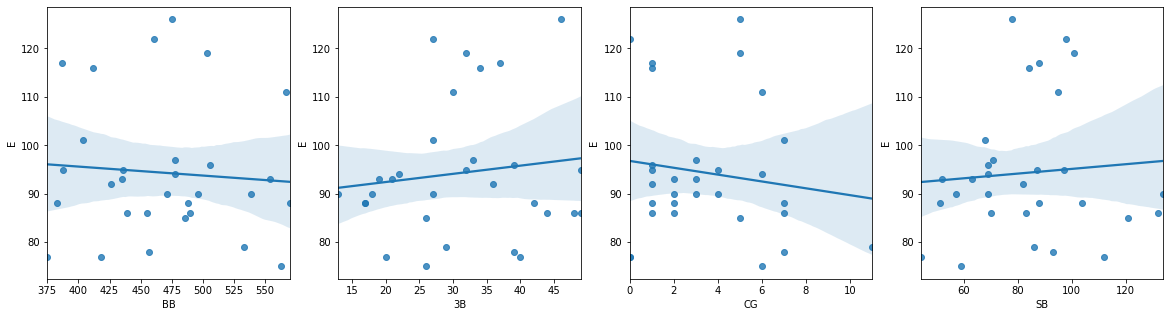

In [18]:
#Let us vizualize inter correlation (multicollinearity) among these input feature columns which are having neutral relationship with target
plt.figure(figsize=(20,5))
ax = plt.subplot(1,4,1)
sns.regplot(x = df['AB'], y = df['H'])
ax = plt.subplot(1,4,2)
sns.regplot(x = df['H'], y = df['3B'])
ax = plt.subplot(1,4,3)
sns.regplot(x = df['AB'], y = df['3B'])
ax = plt.subplot(1,4,4)
sns.regplot(x = df['HR'], y = df['AB'])
plt.show()

plt.figure(figsize=(20,5))
ax = plt.subplot(1,4,1)
sns.regplot(x = df['AB'], y = df['BB'])
ax = plt.subplot(1,4,2)
sns.regplot(x = df['BB'], y = df['SO'])
ax = plt.subplot(1,4,3)
sns.regplot(x = df['SO'], y = df['SB'])
ax = plt.subplot(1,4,4)
sns.regplot(x = df['AB'], y = df['SB'])
plt.show()

plt.figure(figsize=(20,5))
ax = plt.subplot(1,4,1)
sns.regplot(x = df['SB'], y = df['CG'])
ax = plt.subplot(1,4,2)
sns.regplot(x = df['AB'], y = df['CG'])
ax = plt.subplot(1,4,3)
sns.regplot(x = df['HR'], y = df['CG'])
ax = plt.subplot(1,4,4)
sns.regplot(x = df['HR'], y = df['E'])
plt.show()

plt.figure(figsize=(20,5))
ax = plt.subplot(1,4,1)
sns.regplot(x = df['BB'], y = df['E'])
ax = plt.subplot(1,4,2)
sns.regplot(x = df['3B'], y = df['E'])
ax = plt.subplot(1,4,3)
sns.regplot(x = df['CG'], y = df['E'])
ax = plt.subplot(1,4,4)
sns.regplot(x = df['SB'], y = df['E'])
plt.show()

We can observe At bat and Hits are having strong + relation between them

We can observe Triples and Hits are having some + relation between them

We can observe At bat and Triples are having + relation between them

We can observe At bat and Stolen Base are having + relation between them

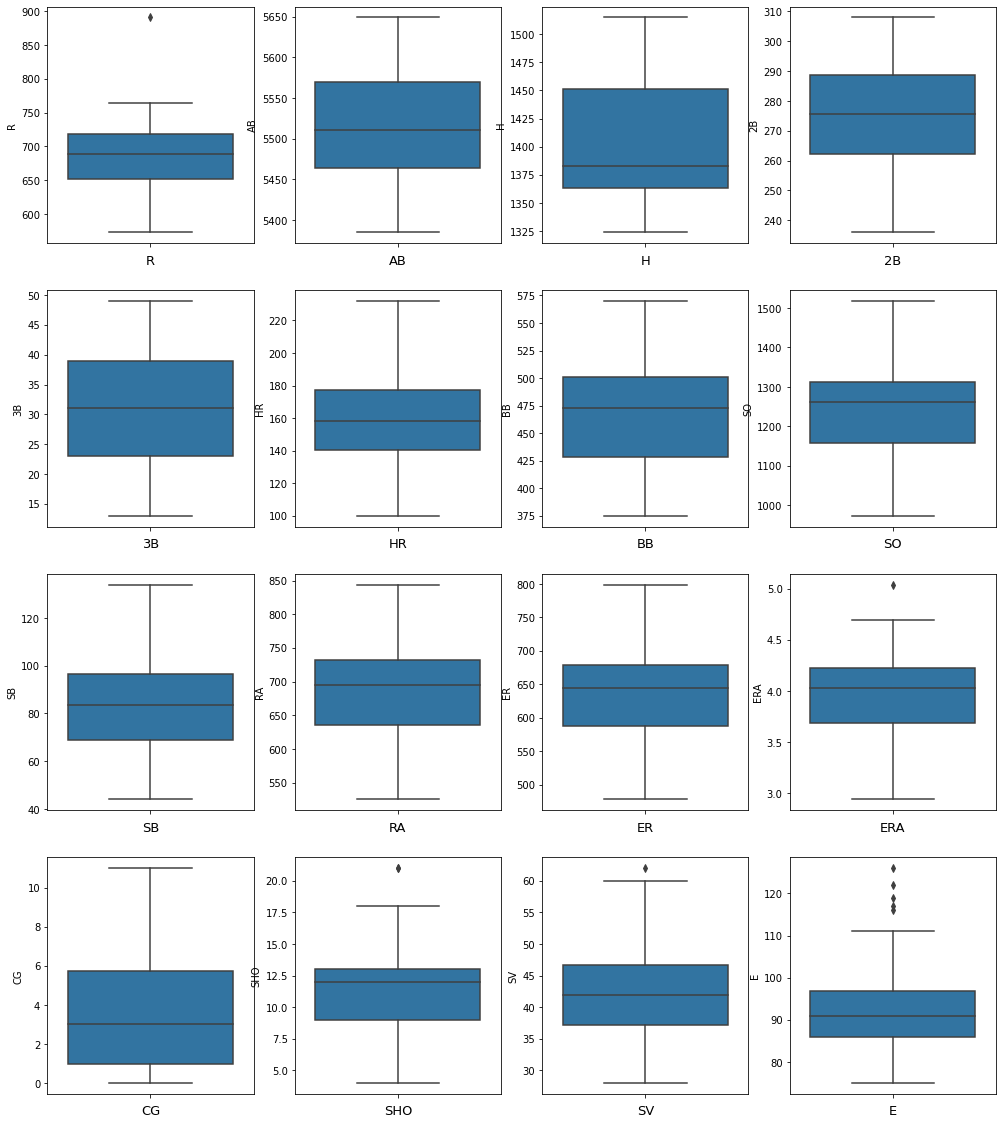

In [19]:
#Outliers/noise checking for input feature columns
df_in = df.drop(['W'], axis=1)
plt.figure(figsize=(17,20))
pltno = 1
for columns in df_in:
    if pltno <=16:
        ax = plt.subplot(4,4,pltno)
        sns.boxplot(y = df_in[columns])
        plt.xlabel(columns, fontsize=13)       
    pltno += 1
plt.show()

Runs R, Earned run average ERA, Shoutout SHO, Save SV all these feature column data are having outliers

But Errors E is having more outliers

All these outliers need to be removed before training the model

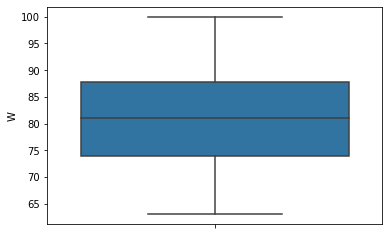

In [20]:
#Checking outliers in output/target column
sns.boxplot(y = df['W'])
plt.show()

No outliers present in target data

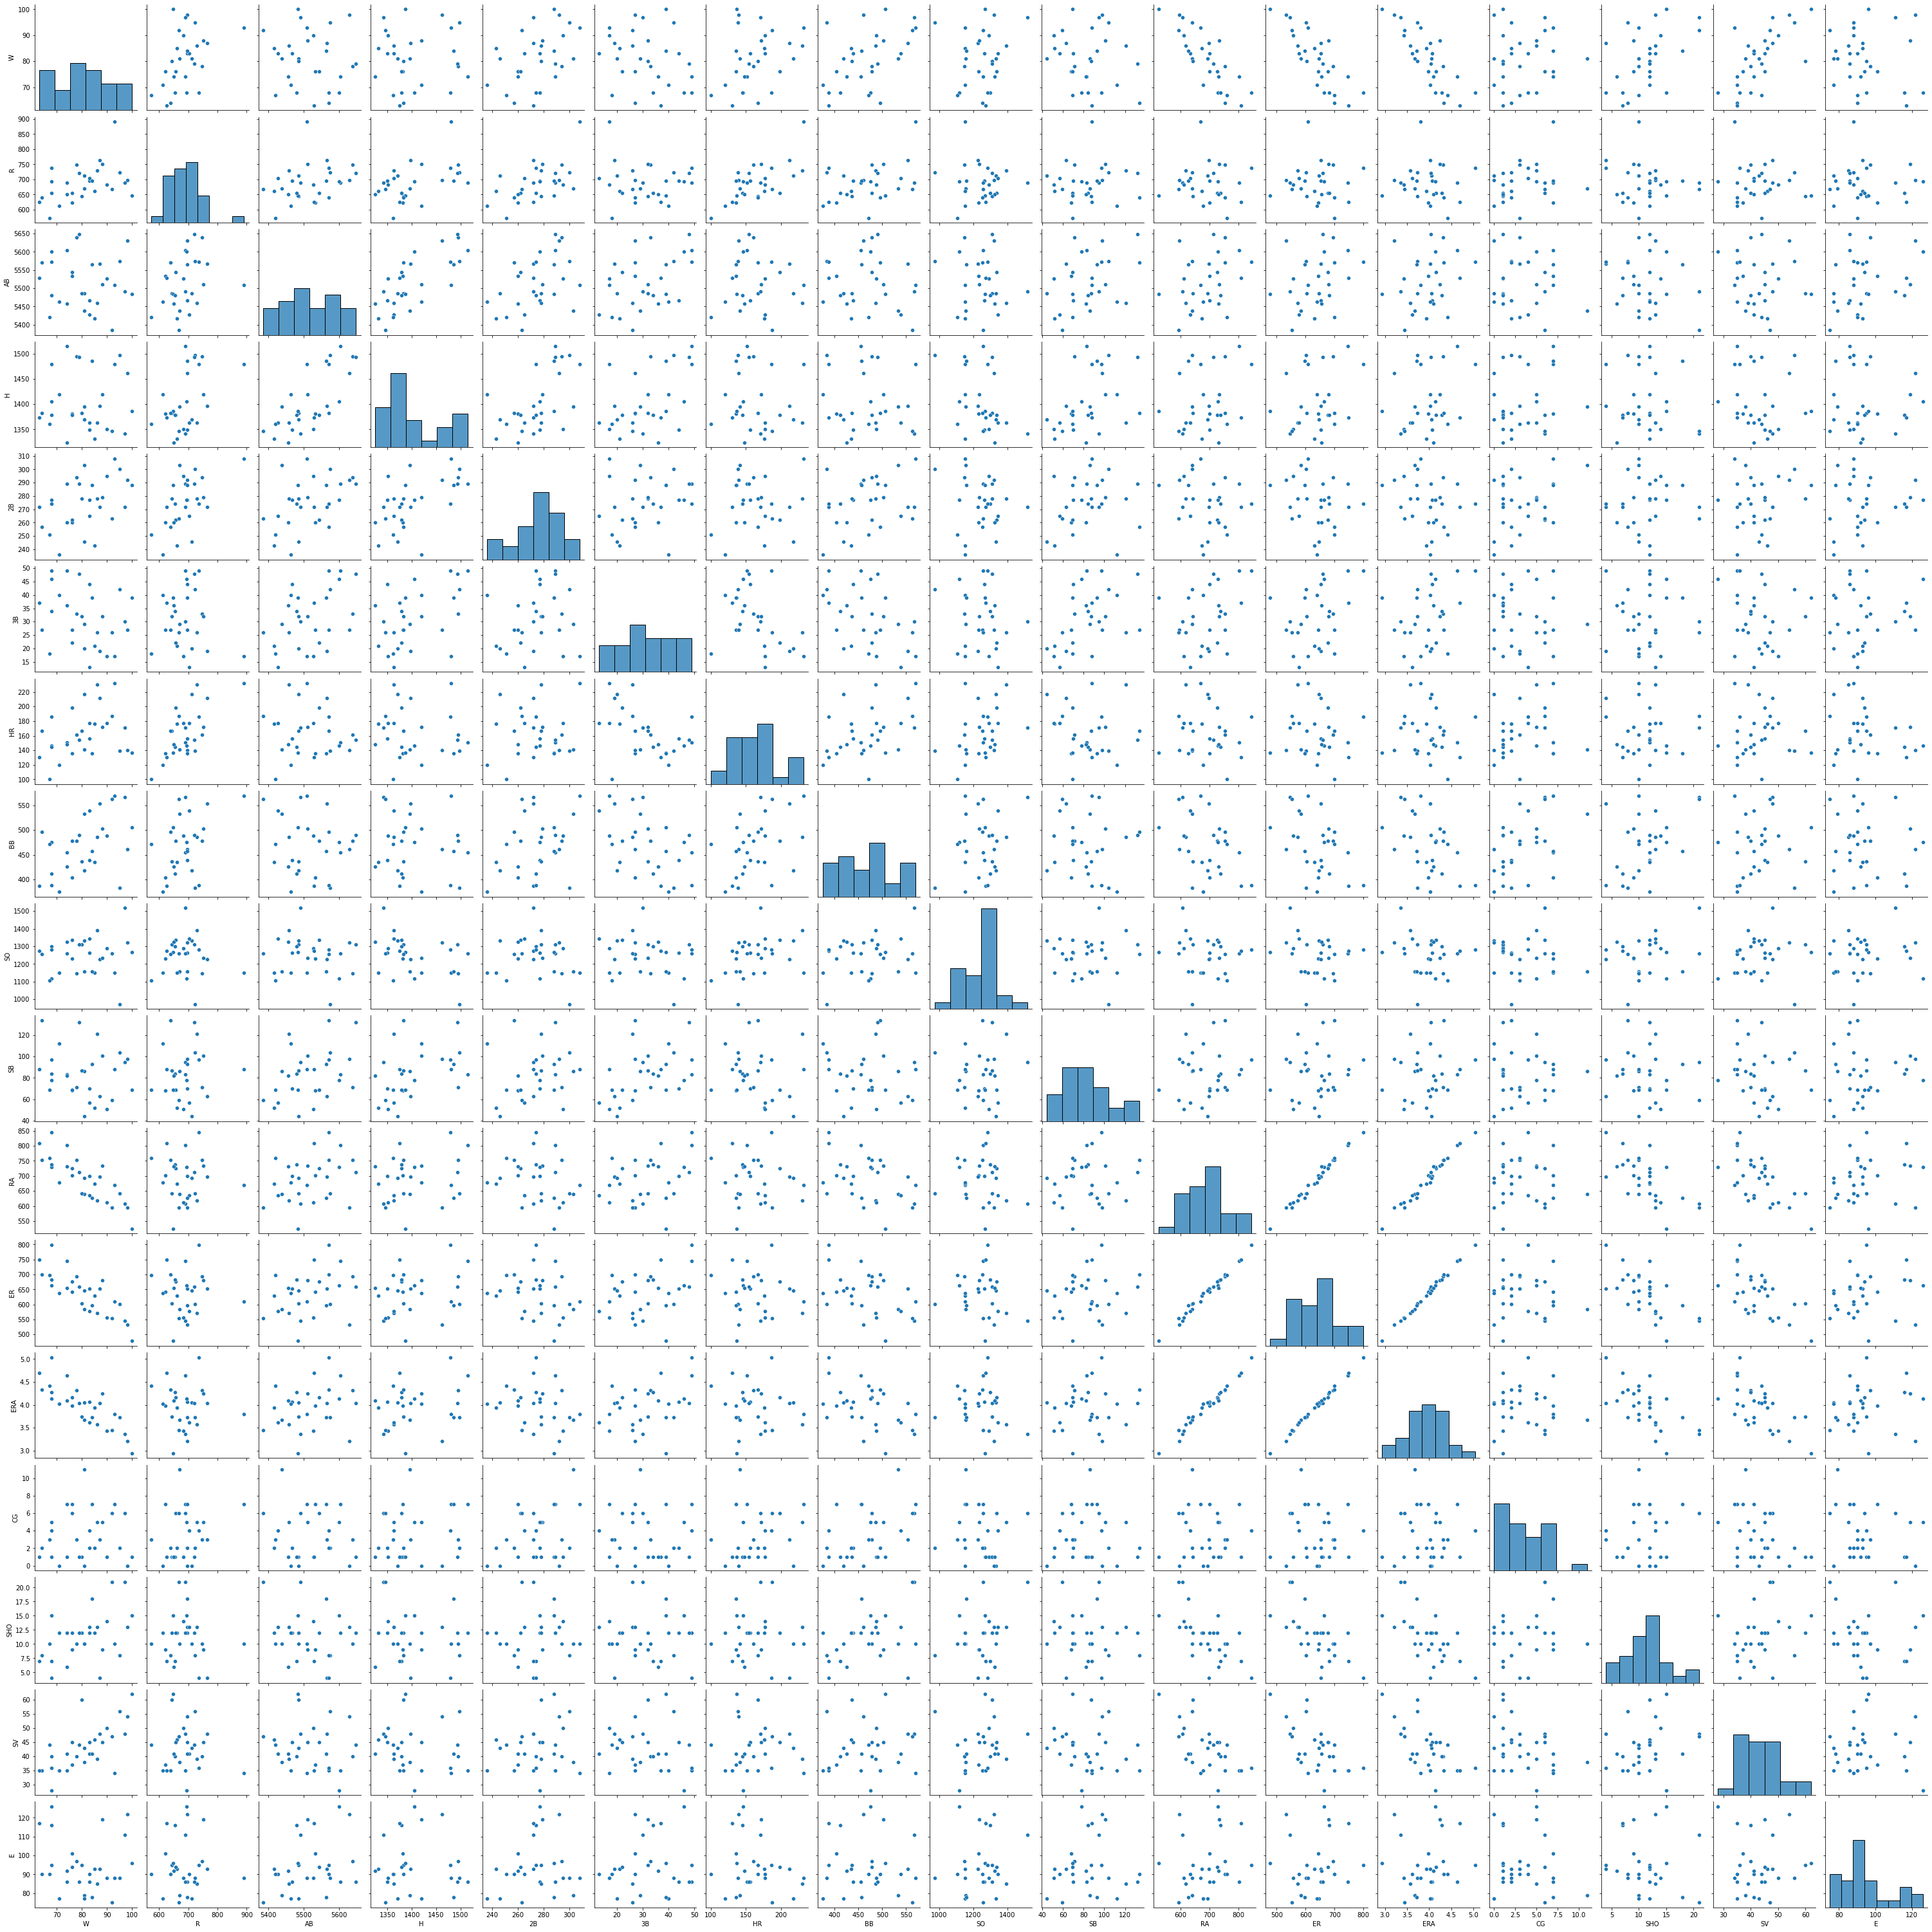

In [21]:
#Plotting all possible bivariate plots together
sns.pairplot(df)
plt.show()

In [22]:
#Statistical summary of the data
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observation:

Counts in each column = 30

standard deviation of each of columns is lesser that half of respective column mean values

data in each columns is of different scales and ranges. Proper scaling needed before training the model.

In [23]:
#Coefficient of correlation matrix
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


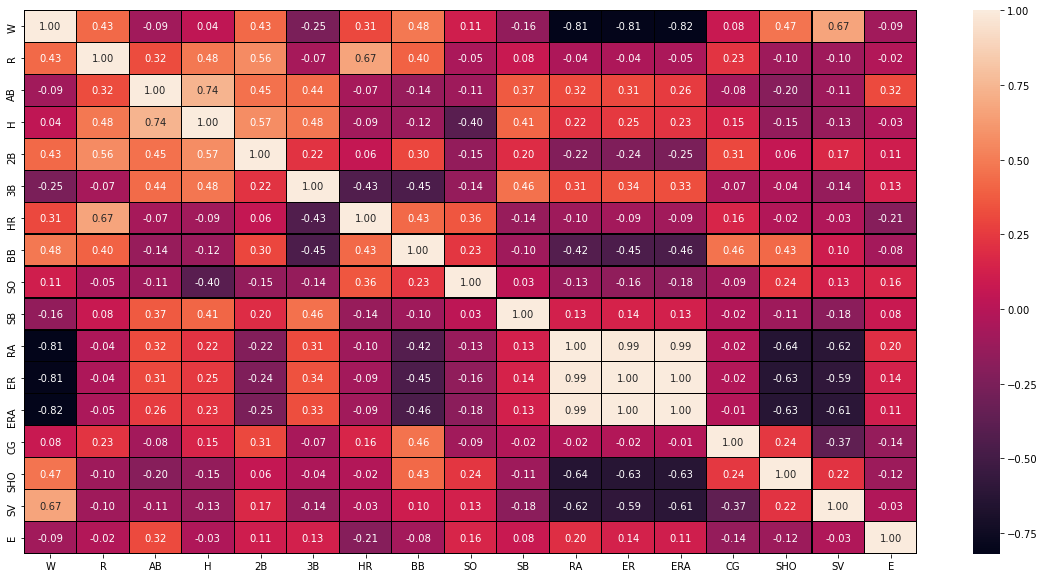

In [24]:
#Heatmap to vizualize correlation between different features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

With target W, SV is showing high +ve collinearity

With target W, (RA, ER, ERA all 3) are showing high -ve collinearity

(ER, ERA, RA) data showing high degree of + ve collinearity among themselves (multicollinearity)

(RA, ER, ERA) with (SV, SHO) data showing high degree of - ve collinearity (multicollinearity)

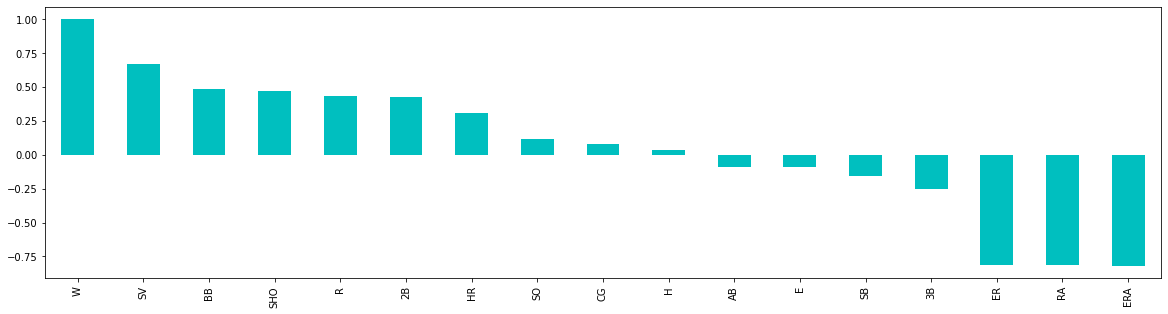

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

In [25]:
#Sorting descending values of correlation data of target variable
#Plotting the same for vizualization
plt.figure(figsize=(20,5))
df.corr()['W'].sort_values(ascending=False).plot(kind='bar', color='c')
plt.show()

df.corr()['W'].sort_values(ascending=False)

In [26]:
#Removing of outliers by zscore method
print('Shape before',df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]
print('Shape after',df_new.shape)

Shape before (30, 17)
Shape after (29, 17)


In [27]:
#Percentage loss of data
loss = (df.shape[0]-df_new.shape[0])*100/(df.shape[0])
print(loss,'% loss of data')

3.3333333333333335 % loss of data


3.33% loss of data is acceptable

In [67]:
#Seperate feature and target columns
x = df_new.drop(columns=['W'], axis=1)
y = df_new['W']
print('x shape',x.shape)
print('y shape',y.shape)

x shape (29, 16)
y shape (29,)


Since input data is discrete in nature, VIF method cannot be applied for checking multicollinearity

And we cannot handle multicollinearity by PCA technique

In order to handle feature selection (reduce curse of dimensionality / handling multicollinearity) let us use chi2 method

In [68]:
#Feature selection
from sklearn.feature_selection import SelectPercentile, chi2
per = SelectPercentile(score_func=chi2, percentile=70) #Specified to retain only 70% of features in feature selection process
per = per.fit(x,y)
df_scores = pd.DataFrame({'Feature':x.columns, 'Chi2':per.scores_, 'p value':per.pvalues_})
df_scores.sort_values(by='Chi2', ascending=False)

,Feature,Chi2,p value
7,SO,204.888061,1.254117e-31
9,RA,197.101792,4.194304e-30
10,ER,191.050119,6.351106e-29
8,SB,166.997587,2.809275e-24
6,BB,139.722802,4.056144e-19
5,HR,114.119949,2.016215e-14
0,R,76.195671,6.772880e-08
4,3B,69.598698,7.648404e-07
15,E,53.473438,1.950212e-04
2,H,46.054095,1.946075e-03


In [75]:
#After reducing of 70% in number of feature columns
index = per.get_support(indices=True)
features = x.columns[index]
features

Index(['R', 'H', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'SV', 'E'], dtype='object')

In [84]:
x = x[features]
y = y
print('x shape',x.shape)
print('y shape',y.shape)

x shape (29, 11)
y shape (29,)


In [85]:
#Checking skewness of input feature data columns
x.skew()

R    -0.215364
H     0.783772
3B    0.090124
HR    0.450862
BB    0.151193
SO   -0.233815
SB    0.494966
RA    0.018155
ER    0.018461
SV    0.627480
E     0.840271
dtype: float64

Skewness must be within range +-0.5

In [88]:
#Apply power transform to reduce skewness
from sklearn.preprocessing import PowerTransformer
po = PowerTransformer(method='yeo-johnson')
x_new = po.fit_transform(x)
x_new = pd.DataFrame(x_new, columns=x.columns)
x_new.skew()

R    -0.024842
H     0.000000
3B   -0.075139
HR    0.000448
BB   -0.008572
SO    0.051530
SB   -0.009570
RA   -0.011974
ER   -0.004988
SV   -0.000925
E     0.065585
dtype: float64

Skewness is within the range +-0.5. We can proceed.

In [107]:
x = x_new
y = y

In [108]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [141]:
# Linear regression model
# Selection of best random state
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

for i in range(0,1000):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.2)
    lr.fit(xtr,ytr)
    predytr = lr.predict(xtr)
    predyt = lr.predict(xt)
    
    if round(r2_score(ytr,predytr)*100,2) == round(r2_score(yt,predyt)*100,2):
        print('At RS',i,'Model preforms well')
        print('Train score =',(r2_score(ytr,predytr)*100))
        print('Test score =',(r2_score(yt,predyt)*100),'\n')

At RS 527 Model preforms well
Train score = 90.89418223684007
Test score = 90.89285362982474 



Therefore we split the dataset at best random state 527

In [150]:
xtr, xt, ytr, yt = train_test_split(x,y, random_state=527,test_size=0.2)

In [155]:
#Training the model at best random state
#Defining a training function
def train(model):
    model.fit(xtr,ytr)
    predyt = model.predict(xt)
    print('Test R2 score =',(r2_score(yt,predyt)),'\n')
    print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
    print('Root mean squared error =',(np.sqrt(mean_squared_error(yt,predyt))),'\n')

#Calling the training function by passing model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train(lr)

Test R2 score = 0.9089285362982474 

Mean absolute error = 2.744236738888558 

Root mean squared error = 3.8079654451719347 



In [170]:
#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score

#Creating a cross validation function
def cross_validate(model):
    CVS = []
    lsc = cross_val_score(model,x,y,cv=4)
    print('At CV = 4')
    print('CV score =',lsc.mean())
    CVS.append(lsc.mean())

In [171]:
#Cross validation to check overfitting
cross_validate(lr)

At CV = 4
CV score = 0.5911066547301099


Linear regression model is not giving good performance. Highly overfitted. At CV = 4 Difference between CV score and R2score is 0.31

In [172]:
# Lasso regression
from sklearn.linear_model import Lasso
las = Lasso()
train(las)

Test R2 score = 0.40775029096225 

Mean absolute error = 8.572461373646304 

Root mean squared error = 9.710783427893709 



Lasso model is not giving good results

In [173]:
# Ridge regression
from sklearn.linear_model import Ridge
rid = Ridge()
train(rid)

Test R2 score = 0.7168508856551116 

Mean absolute error = 6.027487799495911 

Root mean squared error = 6.714434541065036 



In [174]:
#Cross validation to check overfitting
cross_validate(rid)

At CV = 4
CV score = 0.6648910932828962


Difference between CV score and R2score is 0.05. This Ridge model is showing better performance compared to Linear regression and Lasso models

Let us do hyperparameter tuning for getting best results and cross validate the same again to check overfitting

In [165]:
#Hyperparameter tuning of Ridge model
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.01,0.1, 1,10], 
              'random_state':range(100,1000,10), 
              'solver':['auto', 'svd', 'cholesky'],
              'max_iter':[1000,1500,2000]}
gsv = GridSearchCV(rid, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

Ridge(alpha=1, max_iter=1000, random_state=100)


In [166]:
#Training using best parameters
rid = Ridge(alpha=1, max_iter=1000, random_state=100)
train(rid)

Test R2 score = 0.7168508856551116 

Mean absolute error = 6.027487799495911 

Root mean squared error = 6.714434541065036 



In [175]:
#Cross validation to check overfitting
cross_validate(rid)

At CV = 4
CV score = 0.6648910932828962


At CV = 4 Difference between CV score and R2score is 0.05. This Ridge model is showing better performance.

In [176]:
# Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
train(gbr)

Test R2 score = 0.7667182351627496 

Mean absolute error = 5.087091768690428 

Root mean squared error = 6.094558310600438 



In [177]:
#Cross validation to check overfitting
cross_validate(gbr)

At CV = 4
CV score = 0.40162476494715704


Model is not giving good performance. Highly overfitted. At CV = 4 Difference between CV score and R2score is 0.36

In [181]:
#Hyperparameter tuning of GBR model
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['friedman_mse', 'squared_error', 'mae','mse'],
              'n_estimators':[100,150,200,250], 
              'max_depth' : [3,5,7,9],
             'max_features':['auto', 'sqrt', 'log2']}
gsv = GridSearchCV(gbr, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

GradientBoostingRegressor(max_depth=7, max_features='sqrt', n_estimators=200)


In [184]:
#Training using best parameters
gbr = GradientBoostingRegressor(max_depth=7, max_features='sqrt', n_estimators=200)
train(gbr)

Test R2 score = 0.6294756210074985 

Mean absolute error = 7.220370045574789 

Root mean squared error = 7.68086681375839 



In [185]:
#Cross validation to check overfitting
cross_validate(gbr)

At CV = 4
CV score = 0.40339468577562415


Gradient boost regression model is not giving good performance. Highly overfitted. At CV = 4 Difference between CV score and R2score is 0.22

In [186]:
#Random forest regressor model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
train(rfr)

Test R2 score = 0.6715527564549895 

Mean absolute error = 6.676666666666667 

Root mean squared error = 7.231604248021321 



In [187]:
#Cross validation to check overfitting
cross_validate(rfr)

At CV = 4
CV score = 0.5261813806076627


At CV = 4 Difference between CV score and R2score is 0.09

In [188]:
#Hyperparameter tuning of RFR model
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[50,100,150,200], 
              'criterion':["squared_error", "absolute_error", "poisson"], 
              'max_depth':[2,4,6,8,10], 
              'max_features' : ["auto", "sqrt", "log2"]}
gsv = GridSearchCV(rfr, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

RandomForestRegressor(max_depth=2, max_features='sqrt', n_estimators=200)


In [189]:
#Training using best parameters
rfc = RandomForestRegressor(max_depth=2, max_features='sqrt', n_estimators=200)
train(rfc)

Test R2 score = 0.5052757680513291 

Mean absolute error = 8.163164660681877 

Root mean squared error = 8.87530797201142 



In [200]:
#Cross validation to check overfitting
cross_validate(rfr)

At CV = 4
CV score = 0.5366906074701729


In [203]:
# Support vector regressor
from sklearn.svm import SVR
svr = SVR()
train(svr)

Test R2 score = 0.15332449253439573 

Mean absolute error = 10.582306717478458 

Root mean squared error = 11.61075173276051 



Support vector regressor is not giving good results

In [204]:
#KNN regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
train(knn)

Test R2 score = 0.35524075366364305 

Mean absolute error = 9.166666666666664 

Root mean squared error = 10.13212712119227 



KNN regressor is not giving good results

In [206]:
#XG boost regressor
import xgboost as xgb
xg = xgb.XGBRegressor()
train(xg)

Test R2 score = 0.4990660122732453 

Mean absolute error = 7.62213134765625 

Root mean squared error = 8.930835499128472 



In [207]:
#Cross validation to check overfitting
cross_validate(xg)

At CV = 4
CV score = 0.37361923721946455


Model is not giving good performance. Highly overfitted. At CV = 4 Difference between CV score and R2score is 0.13

Since model is having most of data (target also) as discrete values (counts)

Poisson distribution suits well. Logarithmic curve will be best fit. Let us use poisson regressor

In [208]:
#Poisson regressor
from sklearn.linear_model import PoissonRegressor
pr = PoissonRegressor()
train(pr)

Test R2 score = 0.8452140195279156 

Mean absolute error = 4.410498459064368 

Root mean squared error = 4.964410113962258 



In [209]:
#Cross validation to check overfitting
cross_validate(pr)

At CV = 4
CV score = 0.736089893194709


At CV = 4, difference between R2 score and CV score is 0.085. Lets us tune the model and predict outcomes

In [237]:
#Hyperparameter tuning of Poisson model
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.01, 0.01, 0.1], 
              'max_iter':[50,100,150,200], 
              'tol':[0.0001,0.001,0.01,0.1], 
              'fit_intercept' : [False, True]}
gsv = GridSearchCV(pr, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

PoissonRegressor(alpha=0.1, max_iter=50, tol=0.1)


In [238]:
#Training using best parameters
pr = PoissonRegressor(alpha=0.1, max_iter=50, tol=0.1)
train(pr)

Test R2 score = 0.8977367121476781 

Mean absolute error = 3.4219516109556403 

Root mean squared error = 4.035168886626366 



In [246]:
#Predicted data vs actual test data
predyt = pr.predict(xt)
actualyt = yt

table = pd.DataFrame()
table['Actual Wins'] = actualyt
table['Predicted Wins'] = np.round(predyt,0)

table

,Actual Wins,Predicted Wins
24,63,65.0
18,68,74.0
0,95,90.0
1,83,82.0
17,97,91.0
26,84,83.0


In [249]:
import pickle
filename='baseball_case.pkl'
pickle.dump(pr,open(filename,'wb'))